In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Disable warning messages
import warnings
warnings.filterwarnings('ignore')

/Users/skhumbuzotshuma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 1: Read data & understand the profile of the business

In [2]:
data = pd.read_csv('/Users/skhumbuzotshuma/Downloads/DS - Data Sets/4/FMCG_data.csv')
pd.set_option('display.max_columns', None)
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

# Step 2: Clean data & feature engineering

In [4]:
# Check for duplicates
duplicates = data.duplicated().sum()

# Check for missing values
missing_values = data.isnull().sum()

duplicates, missing_values

(0,
 Ware_house_ID                       0
 WH_Manager_ID                       0
 Location_type                       0
 WH_capacity_size                    0
 zone                                0
 WH_regional_zone                    0
 num_refill_req_l3m                  0
 transport_issue_l1y                 0
 Competitor_in_mkt                   0
 retail_shop_num                     0
 wh_owner_type                       0
 distributor_num                     0
 flood_impacted                      0
 flood_proof                         0
 electric_supply                     0
 dist_from_hub                       0
 workers_num                       990
 wh_est_year                     11881
 storage_issue_reported_l3m          0
 temp_reg_mach                       0
 approved_wh_govt_certificate      908
 wh_breakdown_l3m                    0
 govt_check_l3m                      0
 product_wg_ton                      0
 dtype: int64)

In [6]:
# Remove duplicates if any
if duplicates > 0:
    df2 = data.drop_duplicates()
else:
    df2 = data

# Display the number of duplicates found and removed
duplicates_removed = duplicates > 0
duplicates, duplicates_removed


(0, False)

In [7]:
# Identify missing values by column
missing_values = df2.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display columns with missing values and the number of missing values
missing_values


workers_num                       990
wh_est_year                     11881
approved_wh_govt_certificate      908
dtype: int64

No duplicate rows were found in the dataset, so no rows were removed.

Next, let's impute missing values. I'll identify the columns with missing values and decide on an appropriate imputation strategy for each type (numerical or categorical). Let's examine which columns have missing values and the extent of these missing values. ​​

We have missing values in three columns:

workers_num: 990 missing values
wh_est_year: 11,881 missing values
approved_wh_govt_certificate: 908 missing values
For imputation:

Numerical columns (workers_num, wh_est_year): We might consider using the median or mean for imputation, depending on the distribution of these columns.
Categorical columns (approved_wh_govt_certificate): We could use the mode (most frequent value) or a placeholder value to indicate missing data.

In [8]:
# Impute missing values
# For numerical columns, use median to avoid the influence of outliers
df2['workers_num'].fillna(df2['workers_num'].median(), inplace=True)
df2['wh_est_year'].fillna(df2['wh_est_year'].median(), inplace=True)

# For categorical columns, use the mode (most frequent value)
mode_govt_certificate = df2['approved_wh_govt_certificate'].mode()[0]
df2['approved_wh_govt_certificate'].fillna(mode_govt_certificate, inplace=True)

# Verify the imputation by checking if there are any missing values left
missing_values_after_imputation = df2.isnull().sum().sum()
missing_values_after_imputation


0

In [9]:
# Columns to check for outliers
outlier_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'product_wg_ton']

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for each selected column
for col in outlier_columns:
    df2 = remove_outliers(df2, col)

# Check the shape of the data after outlier removal
df2.shape


(21150, 24)

In [10]:
# Summary of the cleaned dataset
cleaned_data_summary = {
    'Number of Rows': df2.shape[0],
    'Number of Columns': df2.shape[1],
    'Column Names': df2.columns.tolist(),
    'Data Types': df2.dtypes.to_dict(),
    'Descriptive Statistics': df2.describe()
}

cleaned_data_summary['Descriptive Statistics']


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000
mean,4.058913,0.409645,3.090827,4886.717305,42.355934,0.099196,0.054799,0.658109,163.333475,28.936927,2009.224870,17.507329,0.298771,3.475603,18.792293,22667.335225
std,2.613906,0.664367,1.096518,870.811772,16.044716,0.298932,0.227593,0.474355,62.737572,7.752965,5.658102,9.287228,0.457730,1.695213,8.607745,11780.508306
min,0.000000,0.000000,0.000000,2531.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2083.000000
25%,2.000000,0.000000,2.000000,4299.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2008.000000,10.000000,0.000000,2.000000,11.000000,13099.250000
50%,4.000000,0.000000,3.000000,4831.000000,42.000000,0.000000,0.000000,1.000000,163.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,23074.000000
75%,6.000000,1.000000,4.000000,5420.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2011.000000,24.000000,1.000000,5.000000,26.000000,30150.000000
max,8.000000,2.000000,7.000000,7292.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


# Step 3: Exploratory data analysis (EDA)

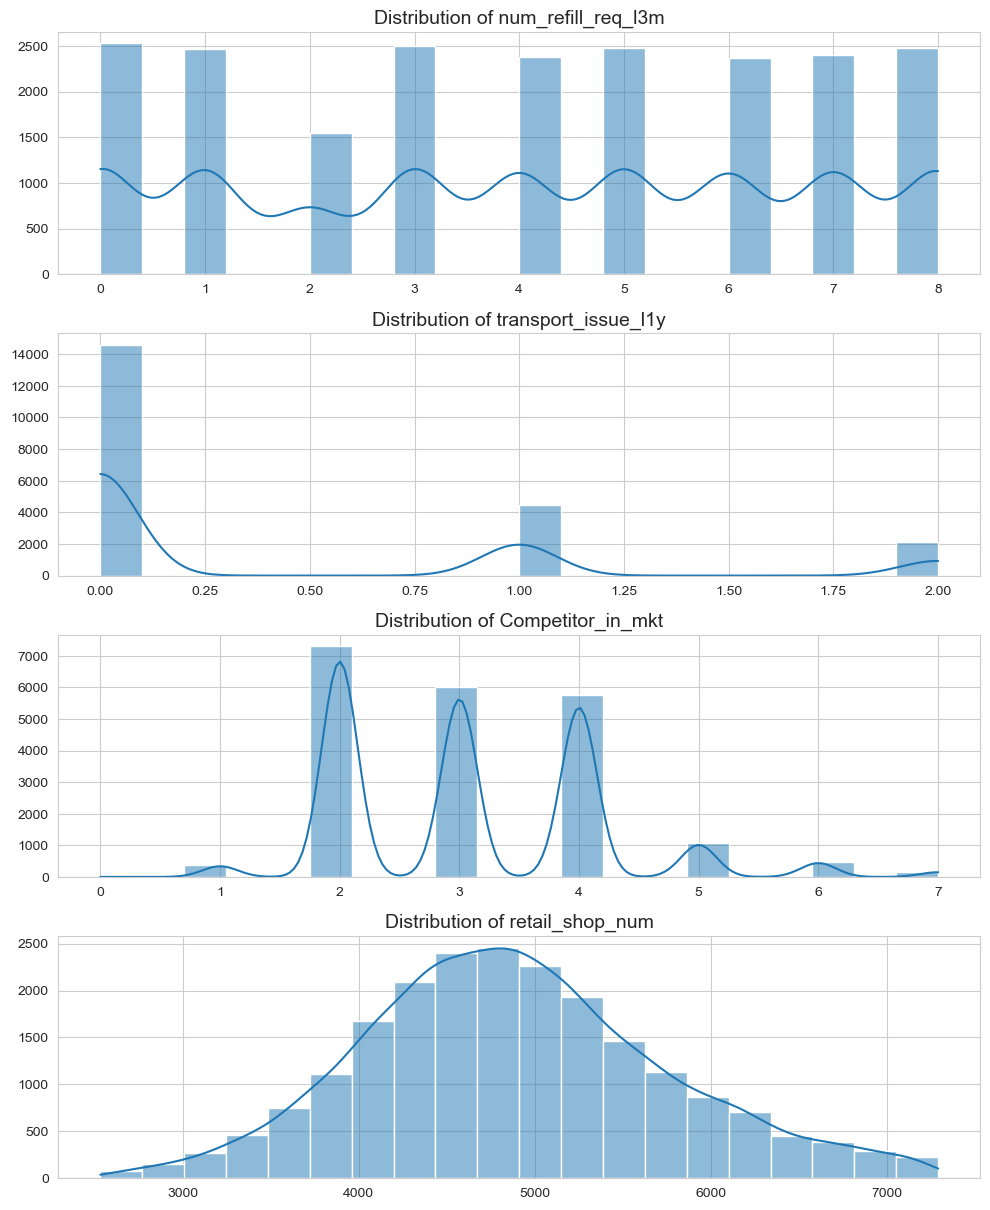

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of numerical variables for univariate analysis
num_vars = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'product_wg_ton']

# Plotting histograms for each variable
fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(10, 15))

# Initialize the subplot with 2 columns
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
#axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Plot histograms for each numerical variable
for i, var in enumerate(num_vars):
    sns.histplot(df2[var], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

if len(num_vars) % 2 != 0: # Remove empty subplot (if num_vars is odd)
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


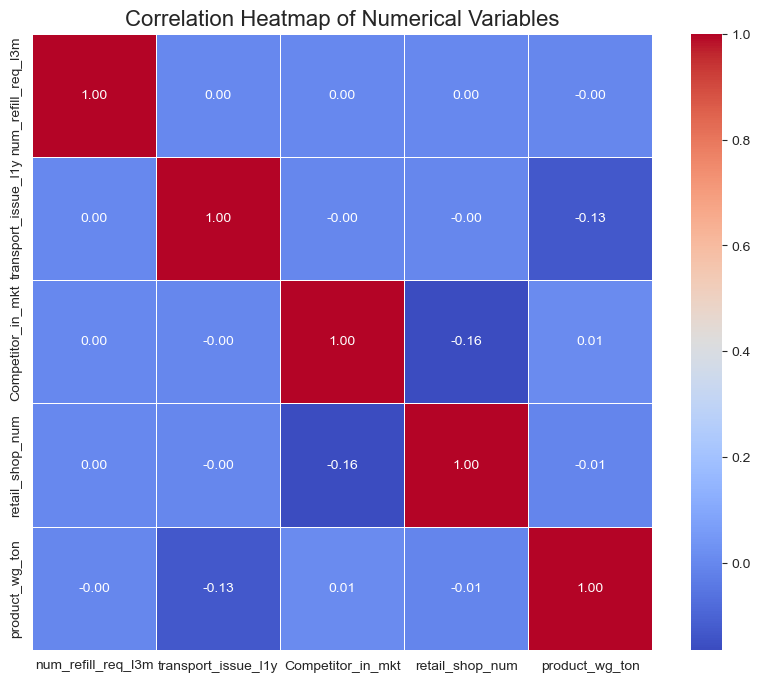

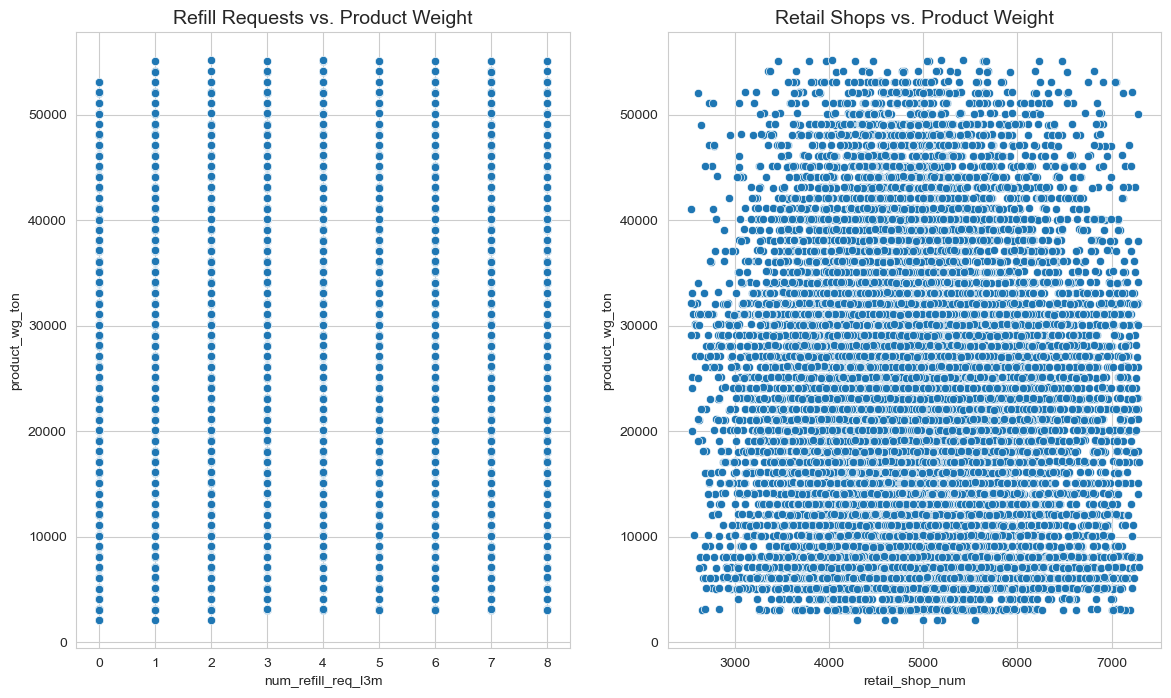

In [14]:
# Heatmap
corr_matrix = df2[num_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

# Scatterplot
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1) # num_refill_req_l3m vs. product_wg_ton
sns.scatterplot(x='num_refill_req_l3m', y='product_wg_ton', data=df2)
plt.title('Refill Requests vs. Product Weight', fontsize=14)

plt.subplot(1, 2, 2) # retail_shop_num vs. product_wg_ton
sns.scatterplot(x='retail_shop_num', y='product_wg_ton', data=df2)
plt.title('Retail Shops vs. Product Weight', fontsize=14)

#plt.tight_layout()
plt.show()


Refill Requests vs. Product Weight: This plot does not show a clear linear relationship between the number of refill requests in the last 3 months and the product weight in tons. The distribution of points suggests that the quantity of product managed by a warehouse does not directly dictate the frequency of refill requests, indicating other factors might play a significant role.

Retail Shops vs. Product Weight: Similarly, the relationship between the number of retail shops served and the product weight handled by warehouses does not display a strong linear pattern. While there are warehouses serving a large number of retail shops with varying amounts of product weight, there's no clear trend indicating that serving more shops necessarily involves handling more product weight.

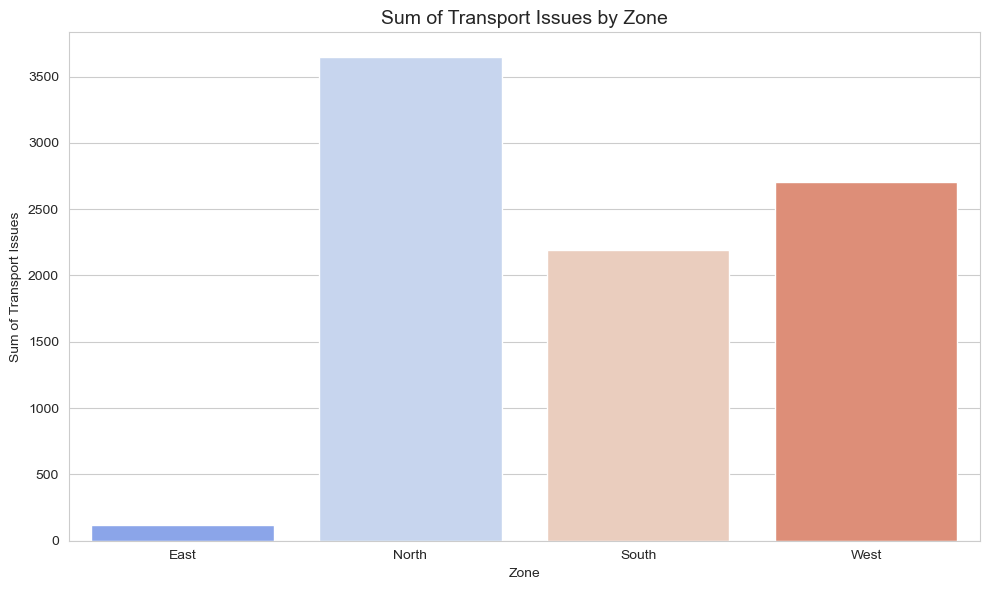

In [15]:
# Adjusted Transport Issues Analysis: Count of transport issues by zone
plt.figure(figsize=(10, 6))

# Summing up transport issues by zone to get a clearer picture
transport_issues_by_zone = df2.groupby('zone')['transport_issue_l1y'].sum().reset_index()

sns.barplot(x='zone', y='transport_issue_l1y', data=transport_issues_by_zone, palette='coolwarm')
plt.title('Sum of Transport Issues by Zone', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Sum of Transport Issues')

plt.tight_layout()
plt.show()


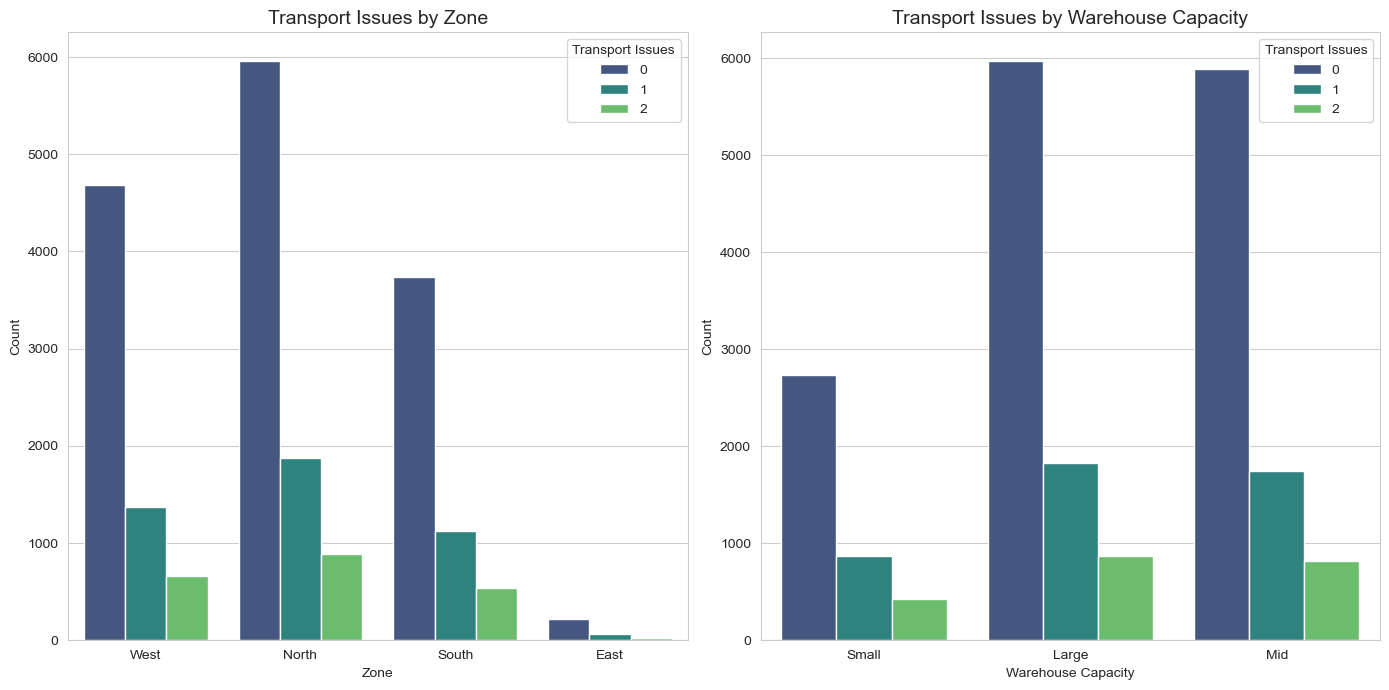

In [16]:
# Transport Issues Analysis: Visualization of transport issues across zones and warehouse capacities
plt.figure(figsize=(14, 7))

# Transport issues by zone
plt.subplot(1, 2, 1)
sns.countplot(x='zone', data=df2, hue='transport_issue_l1y', palette='viridis')
plt.title('Transport Issues by Zone', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Count')
plt.legend(title='Transport Issues')

# Transport issues by warehouse capacity
plt.subplot(1, 2, 2)
sns.countplot(x='WH_capacity_size', data=df2, hue='transport_issue_l1y', palette='viridis')
plt.title('Transport Issues by Warehouse Capacity', fontsize=14)
plt.xlabel('Warehouse Capacity')
plt.ylabel('Count')
plt.legend(title='Transport Issues')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Assuming 'fmcg_data_cleaned' is your DataFrame
# Calculate average product weight and refill requests by warehouse capacity
capacity_analysis = df2.groupby('WH_capacity_size').agg({
    'product_wg_ton': 'mean',
    'num_refill_req_l3m': 'mean'
}).reset_index()

print(capacity_analysis)


  WH_capacity_size  product_wg_ton  num_refill_req_l3m
0            Large    22599.882577            4.065004
1              Mid    22800.198013            4.084694
2            Small    22533.750434            3.991822


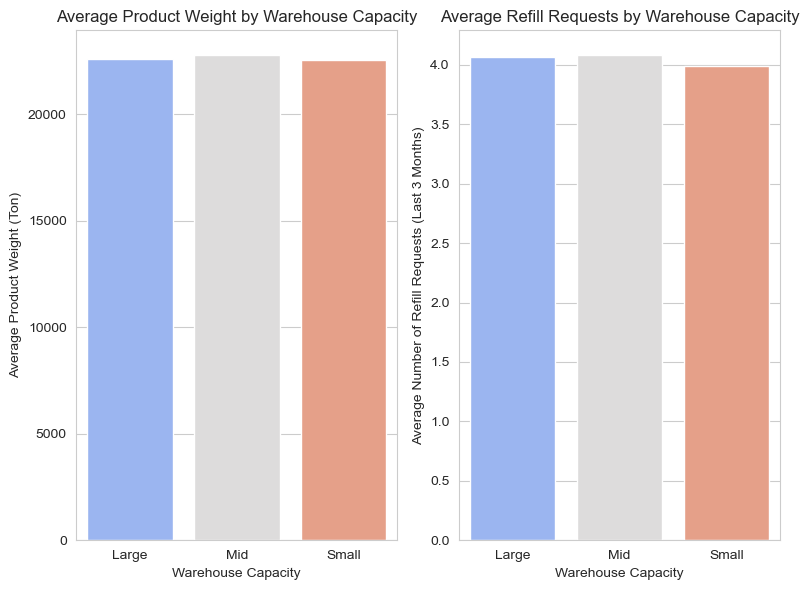

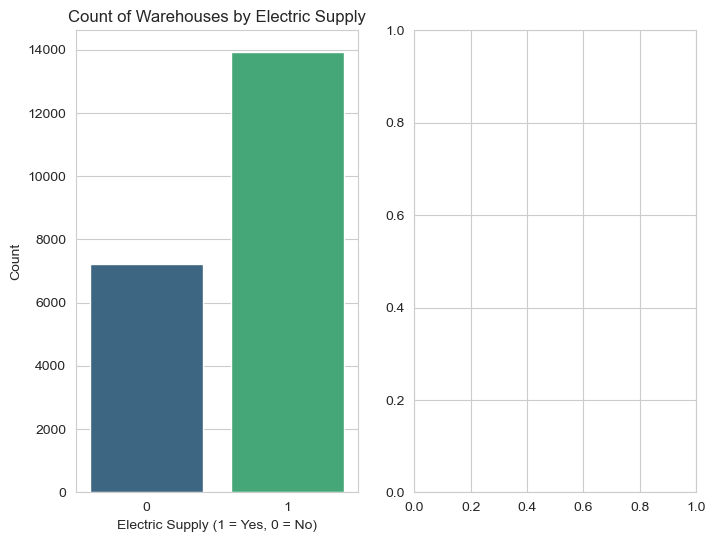

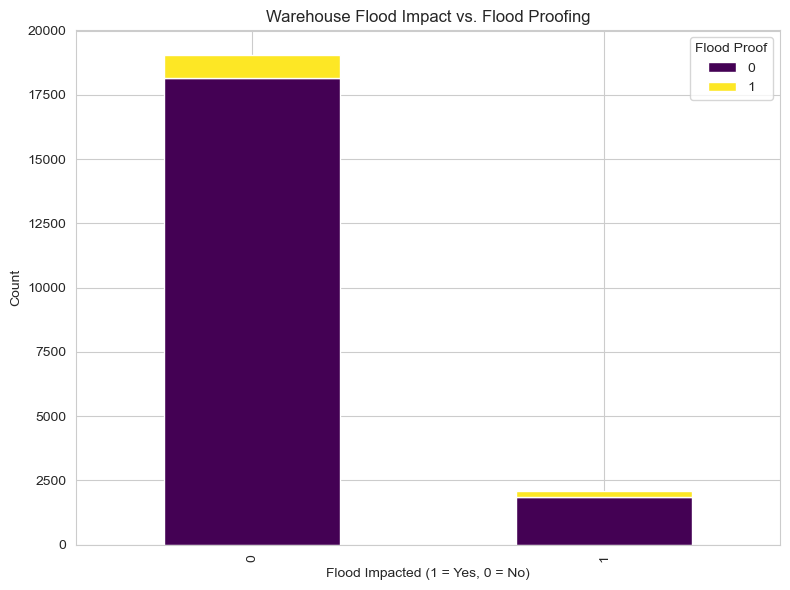

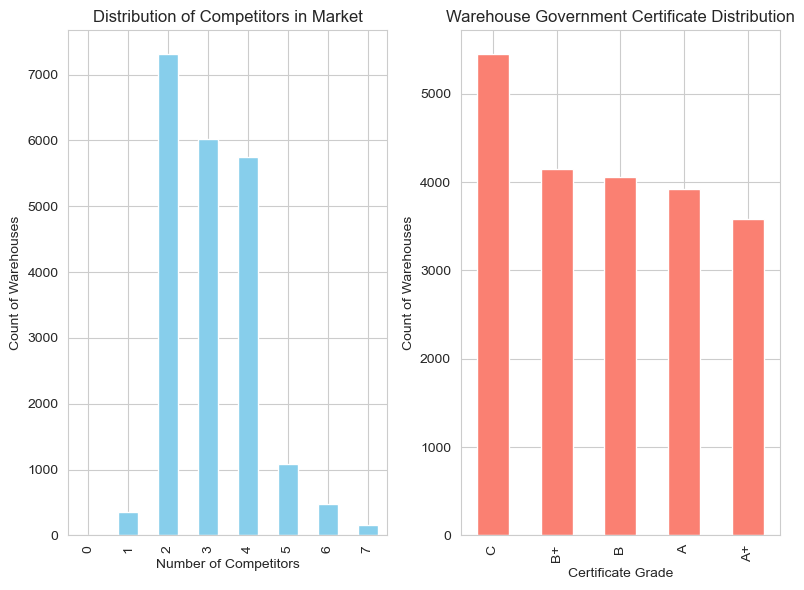

In [18]:
# Warehouse Capacity and Utilization Analysis
capacity_utilization = df2.groupby('WH_capacity_size')['product_wg_ton', 'num_refill_req_l3m'].mean().reset_index()

plt.figure(figsize=(8, 6))

# Plot for product weight by warehouse capacity
plt.subplot(1, 2, 1)
sns.barplot(x='WH_capacity_size', y='product_wg_ton', data=capacity_utilization, palette='coolwarm')
plt.title('Average Product Weight by Warehouse Capacity')
plt.xlabel('Warehouse Capacity')
plt.ylabel('Average Product Weight (Ton)')

# Plot for number of refill requests by warehouse capacity
plt.subplot(1, 2, 2)
sns.barplot(x='WH_capacity_size', y='num_refill_req_l3m', data=capacity_utilization, palette='coolwarm')
plt.title('Average Refill Requests by Warehouse Capacity')
plt.xlabel('Warehouse Capacity')
plt.ylabel('Average Number of Refill Requests (Last 3 Months)')

plt.tight_layout()
plt.show()

# Infrastructure Vulnerabilities: Electric Supply and Flood Impact
plt.figure(figsize=(8, 6))

# Electric supply issues
plt.subplot(1, 2, 1)
sns.countplot(x='electric_supply', data=df2, palette='viridis')
plt.title('Count of Warehouses by Electric Supply')
plt.xlabel('Electric Supply (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Flood impact analysis
plt.subplot(1, 2, 2)
flood_impact = df2.groupby(['flood_impacted', 'flood_proof']).size().unstack(fill_value=0)
flood_impact.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))
plt.title('Warehouse Flood Impact vs. Flood Proofing')
plt.xlabel('Flood Impacted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Flood Proof')

plt.tight_layout()
plt.show()

# Market and Regulatory Risks: Competition and Compliance
competition_analysis = df2['Competitor_in_mkt'].value_counts().sort_index()
compliance_analysis = df2['approved_wh_govt_certificate'].value_counts()

plt.figure(figsize=(8, 6))

# Plot for market competition
plt.subplot(1, 2, 1)
competition_analysis.plot(kind='bar', color='skyblue')
plt.title('Distribution of Competitors in Market')
plt.xlabel('Number of Competitors')
plt.ylabel('Count of Warehouses')

# Plot for regulatory compliance
plt.subplot(1, 2, 2)
compliance_analysis.plot(kind='bar', color='salmon')
plt.title('Warehouse Government Certificate Distribution')
plt.xlabel('Certificate Grade')
plt.ylabel('Count of Warehouses')

plt.tight_layout()
plt.show()



Transport Issues: Analyzing the frequency and distribution of transport issues (transport_issue_l1y) to identify warehouses or regions more prone to logistics disruptions.
Warehouse Capacity and Utilization: Evaluating WH_capacity_size in relation to the number of refill requests (num_refill_req_l3m) and product weight (product_wg_ton) to assess if any warehouses are at risk of over or underutilization.
Electric Supply and Flood Impact: Considering the impact of infrastructure vulnerabilities (electric_supply, flood_impacted, flood_proof) on warehouse operations.
Competition in Market: Understanding the level of competition (Competitor_in_mkt) and its potential impact on supply chain resilience.
Regulatory Compliance: Assessing the status of government certificates (approved_wh_govt_certificate) as a proxy for regulatory compliance risk.

Summarizing the distribution of transport issues across all warehouses.
Identifying warehouses with a high number of transport issues, as they may represent higher transportation risk.
Examining the relationship between transport issues and other factors such as location type (Urban/Rural), warehouse capacity, and geographical zone to identify any patterns or insights.

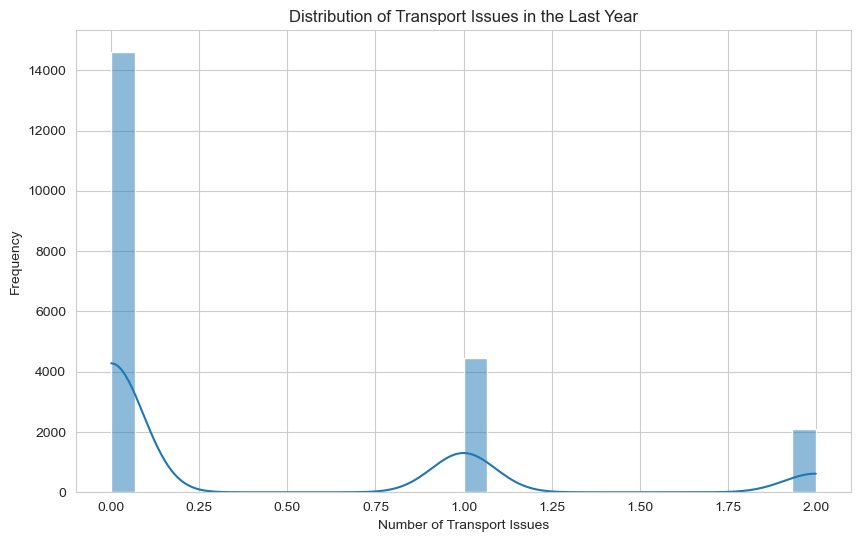

count    21150.000000
mean         0.409645
std          0.664367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: transport_issue_l1y, dtype: float64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of transport issues
transport_issues_summary = df2['transport_issue_l1y'].describe()

# Distribution of transport issues
plt.figure(figsize=(10, 6))
sns.histplot(df2['transport_issue_l1y'], bins=30, kde=True)
plt.title('Distribution of Transport Issues in the Last Year')
plt.xlabel('Number of Transport Issues')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

transport_issues_summary


In [20]:
# Urban vs. Rural Location Optimization Analysis
# Grouping data by Location_type and calculating mean values for relevant metrics
location_comparison = df2.groupby('Location_type').agg({
    'transport_issue_l1y': 'mean',  # Average transport issues
    'num_refill_req_l3m': 'mean',   # Average refill requests in the last 3 months
    'product_wg_ton': 'mean',       # Average product weight handled
    'retail_shop_num': 'mean',      # Average number of retail shops served
}).reset_index()

# Geographical Zone Balancing Analysis
# Counting the number of warehouses per zone
zone_distribution = data['zone'].value_counts().reset_index()
zone_distribution.columns = ['Zone', 'Number of Warehouses']

location_comparison, zone_distribution


(  Location_type  transport_issue_l1y  num_refill_req_l3m  product_wg_ton  \
 0         Rural             0.406876            4.051567    22397.693377   
 1         Urban             0.440954            4.141943    25715.276323   
 
    retail_shop_num  
 0      4888.652051  
 1      4864.847586  ,
     Zone  Number of Warehouses
 0  North                 10278
 1   West                  7931
 2  South                  6362
 3   East                   429)

# Demand Forecasting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming each row in the dataset represents a uniform time interval, we'll generate lag features
# Let's use a simple lag of 1 period (assuming monthly data for demonstration)

# Generating lag features
data['lag_1'] = df2['num_refill_req_l3m'].shift(1)

# Dropping the first row since it now contains NaN for the lag feature
data_lag = data.dropna(subset=['lag_1'])

# Defining the features and target variable
X = data_lag[['lag_1']]  # Features: just the lag_1 for simplicity
y = data_lag['num_refill_req_l3m']  # Target: the number of refill requests

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE) for the model
mse = mean_squared_error(y_test, y_pred)

mse


6.75229391466567

# Route Optimization for Deliveries

In [19]:
import numpy as np
import random

# Assuming a simplified scenario with a fixed number of locations
# For demonstration, let's define a simple grid world environment
num_warehouses = 5  # Number of warehouses
num_shops = 10  # Number of retail shops to serve
grid_size = 5  # Grid size for a simplified representation

# Initialize the environment (warehouses and shops locations)
# For simplicity, locations are randomly assigned on the grid
warehouse_locations = {f'WH_{i}': (random.randint(0, grid_size-1), random.randint(0, grid_size-1)) for i in range(num_warehouses)}
shop_locations = {f'Shop_{i}': (random.randint(0, grid_size-1), random.randint(0, grid_size-1)) for i in range(num_shops)}

# Example of initializing an RL model (conceptual)
# In practice, use an RL library like OpenAI Gym to define state, action, and reward

# State: Representation of the agent's current location and shops to be served
# Action: Decisions to move to the next location
# Reward: Negative distance traveled; higher penalty for unserved shops

# Training loop (highly simplified and conceptual)
for episode in range(1000):  # Number of episodes to train
    current_state = initialize_state()  # Initialize agent's state
    done = False
    while not done:
        action = choose_action(current_state)  # Agent chooses an action based on policy
        next_state, reward, done = step(action)  # Environment responds with next state and reward
        update_q_table(current_state, action, reward, next_state)  # Update Q-table or model
        current_state = next_state  # Move to the next state


NameError: name 'initialize_state' is not defined

In [20]:
class DeliveryRouteOptimization:
    def __init__(self):
        # Distances between locations: warehouse (WH), shop1 (S1), shop2 (S2)
        self.distances = {
            ('WH', 'S1'): 10,  # Distance from warehouse to shop1
            ('WH', 'S2'): 15,  # Distance from warehouse to shop2
            ('S1', 'S2'): 7    # Distance between shop1 and shop2
        }
        self.state = 'WH'  # Starting at the warehouse
        self.total_distance = 0  # Total distance traveled

    def step(self, action):
        """Take an action (move to the next location), return the reward."""
        if self.state == 'WH':
            self.state = action  # Move to the next shop
            self.total_distance += self.distances[('WH', action)]
        else:
            # Moving from the first shop to the second shop
            self.total_distance += self.distances[(self.state, action)]
            self.state = 'Done'  # Delivery


In [21]:
DeliveryRouteOptimization

__main__.DeliveryRouteOptimization